### 兩群與三群生成資料函式

In [19]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

def GenDataforN(seed, n_list, mu_list, Cov_list):
    rng = np.random.default_rng(seed=seed)
    X_list, y_list = [], []

    for i, n in enumerate(n_list):
        mvn = rng.multivariate_normal(mean=mu_list[i], cov=Cov_list[i], size=n)
        X_list.append(mvn)
        y_list.append(np.full(n, i))

    X = np.vstack(X_list)
    y = np.hstack(y_list)
    return X, y


#切割訓練與測試資料
#X = D[:, 0:2]
#Y = D[:, 2]
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#D_train = np.hstack((X_train, Y_train.reshape(-1, 1)))
#D_test = np.hstack((X_test, Y_test.reshape(-1, 1)))

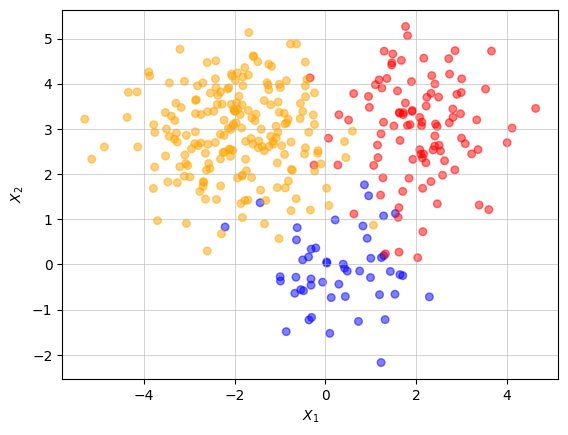

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

X,y= GenDataforN(seed = 123 , n_list =[50,100,200]
            , mu_list = [np.array([0, 0]) , np.array([2, 3]) , np.array([-2, 3])]
            , Cov_list = [np.array([[1, 0], [0, 1]])
                          ,np.array([[1, 0], [0, 1]])
                          ,np.array([[1, 0], [0, 1]])
                          ] )

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' if i==1 else 'orange' for i in y]
plot = ax.scatter(X[:, 0], X[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

### 範例(兩群)

Training error for LDA = 0.0321
Training error for QDA = 0.0286
Training error for KNN (k=15) = 0.0321
Training error for KNN (k=30) = 0.0321


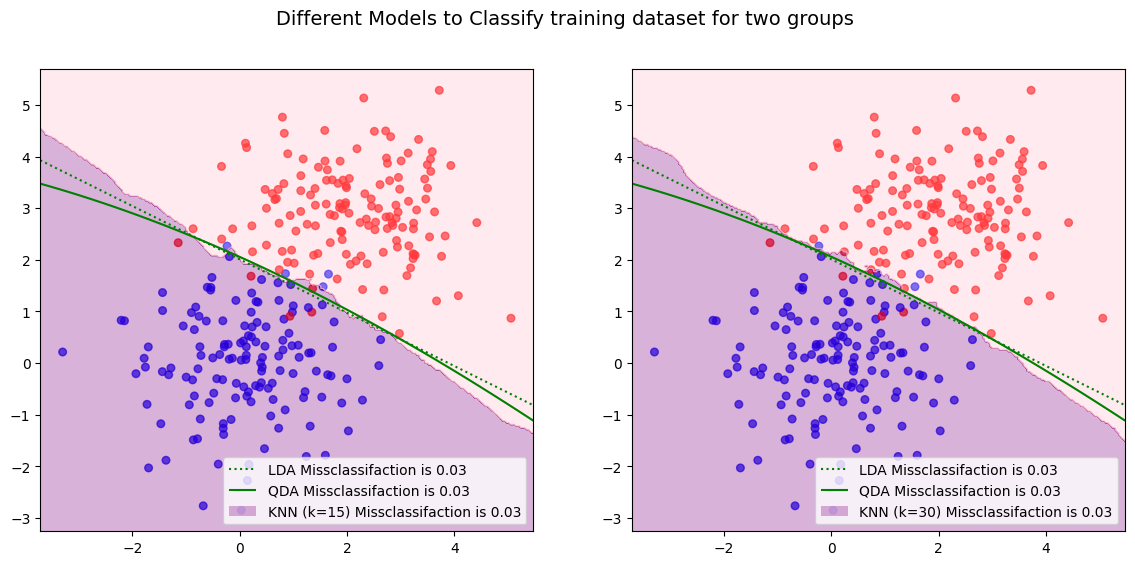

In [8]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X,y = GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([0, 0]) , np.array([2, 3])]
            , Cov_list = [ np.array([[1, 0], [0, 1]]) , np.array([[1, 0], [0, 1]]) ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D_test = np.hstack((X_test, y_test.reshape(-1, 1)))

D = D_train
X = D[:, 0:2]
y = D[:,2]

fig,ax=plt.subplots(1,2,figsize=(14,6),squeeze=False)
fig.suptitle('Different Models to Classify training dataset for two groups',fontsize = 14)
group_colors = ['blue' if i == 0 else 'red' for i in y]
ax[0][0].scatter(D[:, 0], D[:, 1], c = group_colors, s = 30, alpha = 0.7, marker = 'o' ) 
ax[0][1].scatter(D[:, 0], D[:, 1], c = group_colors, s = 30, alpha = 0.7, marker = 'o' )

#draw LDA
Lda=LinearDiscriminantAnalysis()
Lda.fit(X,y)
trainErrLDA=1-Lda.score(X,y)
x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
x_=np.linspace(x_min,x_max,len(D[:, 0:1]))
y_=np.linspace(y_min,y_max,len(D[:, 1:2]))
xx,yy=np.meshgrid(x_,y_)
Z0=Lda.predict_proba(np.c_[xx.ravel(),yy.ravel()])#算出後驗機率
Z0=Z0[:,1].reshape(xx.shape)

# contoursLDA=ax[0][0].contour(xx,yy,Z0,[0.5],colors='g')
# contoursLDA1=ax[0][1].contour(xx,yy,Z0,[0.5],colors='g')
C1, C2 = X[y==0,:], X[y==1,:]
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2
#draw classification line of LDA
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2)  @ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(x_min,x_max, 10)
b=ax[0][0].plot(x, f(x) ,c = 'green' ,linestyle =':')
b=ax[0][1].plot(x, f(x) ,c = 'green' ,linestyle =':')

#draw QDA
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainErrQDA=1-Qda.score(X,y)
Z2 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2[:, 1].reshape(xx.shape)
contoursQDA= ax[0][0].contour(xx, yy, Z2, [0.5],colors = 'green' )
contoursQDA1= ax[0][1].contour(xx, yy, Z2, [0.5],colors = 'green' )

#draw KNN
K = [15,30]
Knn = neighbors.KNeighborsClassifier(K[0], weights = 'uniform')
Knn1 = neighbors.KNeighborsClassifier(K[1], weights = 'uniform')
Knn.fit(X, y)
Knn1.fit(X, y)
trainingErrKNN = 1 - Knn.score(X, y) 
trainingErrKNN1 = 1 - Knn1.score(X, y)

z1 = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
z10 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z10 = z10.reshape(xx.shape)
cmap_light =colors.ListedColormap(['purple', 'pink'])
contoursKNN=ax[0][0].contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
contoursKNN1=ax[0][1].contourf(xx, yy, Z10, cmap = cmap_light, alpha = 0.3)

# h1,_=contoursLDA.legend_elements()
# h11,_=contoursLDA1.legend_elements()
h2,_=contoursQDA.legend_elements()
h3,_=contoursKNN.legend_elements()
h33,_=contoursKNN1.legend_elements()

ax[0][0].legend([b[0],h2[0],h3[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN (k=15) Missclassifaction is {:.2f}'.format(trainingErrKNN)],fontsize=10)
ax[0][1].legend([b[0],h2[0],h33[0]],['LDA Missclassifaction is {:.2f}'.format(trainErrLDA),'QDA Missclassifaction is {:.2f}'.format(trainErrQDA),'KNN (k=30) Missclassifaction is {:.2f}'.format(trainingErrKNN1)],fontsize=10)

#模型評估
print('Training error for LDA = {:.4f}'.format(trainErrLDA))
print('Training error for QDA = {:.4f}'.format(trainErrQDA))
print('Training error for KNN (k=15) = {:.4f}'.format(trainingErrKNN))
print('Training error for KNN (k=30) = {:.4f}'.format(trainingErrKNN1))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn import neighbors
import numpy as np

# ... Generate simulated data X, y
X,y = GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([0, 0]) , np.array([2, 3])]
            , Cov_list = [ np.array([[1, 0], [0, 1]]) , np.array([[1, 0], [0, 1]]) ])

K =100
numneighbor=[15,30]
Lda_trainingError = np.zeros(K)
Lda_testingError = np.zeros(K)
Qda_trainingError = np.zeros(K)
Qda_testingError = np.zeros(K)
Knn_trainingError=np.zeros(K)
Knn_testingError=np.zeros(K)
Knn1_trainingError=np.zeros(K)
Knn1_testingError=np.zeros(K)
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Knn = neighbors.KNeighborsClassifier(numneighbor[0], weights = 'uniform')    
Knn1 = neighbors.KNeighborsClassifier(numneighbor[1], weights = 'uniform')   

for i in range(K) :        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        Lda.fit(X_train, y_train)
        Lda_trainingError[i] = 1-Lda.score(X_train,y_train)
        Lda_testingError[i] =1-Lda.score(X_test,y_test) 
        # print('LDA training Error:{:.4f}'.format(Lda_trainingError[i])) 
        # print('LDA testing Error:{:.4f}'.format(Lda_testingError[i]))   
        Qda.fit(X_train, y_train)
        Qda_trainingError[i] = 1-Qda.score(X_train,y_train)
        Qda_testingError[i] =1-Qda.score(X_test,y_test) 
        Knn.fit(X_train, y_train)
        Knn_trainingError[i] = 1-Knn.score(X_train,y_train)
        Knn_testingError[i] =1-Knn.score(X_test,y_test) 
        Knn1.fit(X_train, y_train)
        Knn1_trainingError[i] = 1-Knn1.score(X_train,y_train)
        Knn1_testingError[i] =1-Knn1.score(X_test,y_test)
print('LDA mean testing Error:{:.4f}'.format(Lda_testingError.mean()))        
print('LDA mean training Error:{:.4f}'.format(Lda_trainingError.mean()))
print('QDA mean testing Error:{:.4f}'.format(Qda_testingError.mean()))        
print('QDA mean training Error:{:.4f}'.format(Qda_trainingError.mean()))
print('Knn(n=15) mean testing Error:{:.4f}'.format(Knn_testingError.mean()))        
print('Knn(n=15) mean training Error:{:.4f}'.format(Knn_trainingError.mean()))
print('Knn(n=30) mean testing Error:{:.4f}'.format(Knn1_testingError.mean()))        
print('Knn(n=30) mean training Error:{:.4f}'.format(Knn1_trainingError.mean()))

LDA mean testing Error:0.0395
LDA mean training Error:0.0356
QDA mean testing Error:0.0385
QDA mean training Error:0.0341
Knn(n=15) mean testing Error:0.0444
Knn(n=15) mean training Error:0.0372
Knn(n=30) mean testing Error:0.0403
Knn(n=30) mean training Error:0.0348


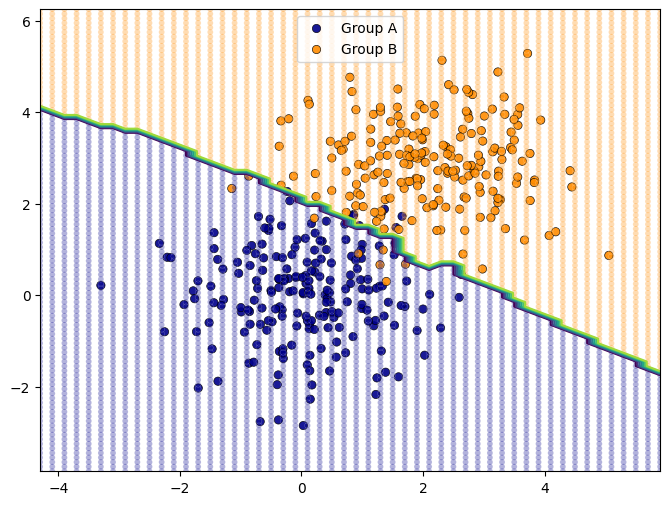

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X,y= GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([0, 0]) , np.array([2, 3])]
            , Cov_list = [np.array([[1, 0], [0, 1]])
                          ,np.array([[1, 0], [0, 1]])] )


y = y.astype('int') # convert to integers
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = 'black')

# KNN learning
K = 15
intrvl = 0.2 # grid interval
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl), \
np.arange(y_min, y_max, 0.1)) # grid points: matrices
z = np.zeros(xx.size) # a vector for KNN predictions
for i in range(xx.size) :
    tmp = np.tile([xx.ravel()[i], yy.ravel()[i]], (n, 1))
    d = np.linalg.norm(tmp - X, axis = 1) # n distances
    idx = np.argsort(d) # sorting K distances
    z[i] = np.mean(y[idx[:K]]) # average K sorted y−values
z = [0 if i < 0.5 else 1 for i in z]
sns.scatterplot(x = xx.ravel(), y = yy.ravel(), size = 2,\
markers = '.', palette = cmap_bold, hue = z, \
alpha = 0.3, legend = False)

Z = np.reshape(z, xx.shape) # reshape z to a matrix
plt.contour(xx, yy, Z)


Text(0.5, 1.0, 'Training error = 0.0350 for K = 15')

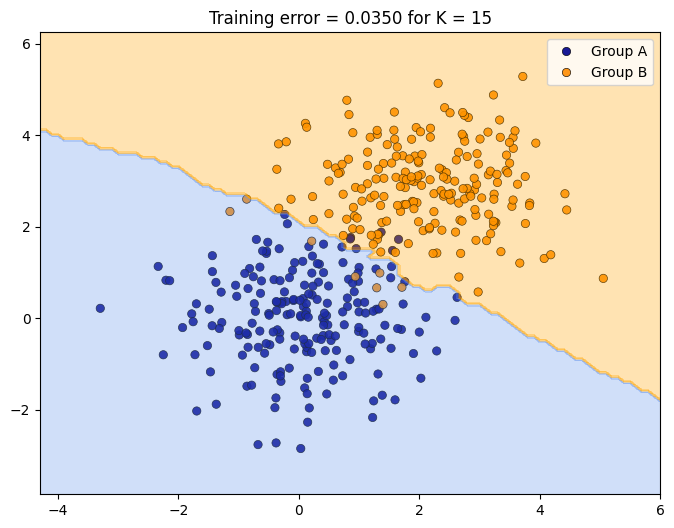

In [20]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from sklearn import neighbors
import seaborn as sns

X,y= GenDataforN(seed = 123 , n_list =[200,200]
            , mu_list = [np.array([0, 0]) , np.array([2, 3])]
            , Cov_list = [np.array([[1, 0], [0, 1]])
                          ,np.array([[1, 0], [0, 1]])] )

y = y.astype('int') # convert to integers
n = len(y)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(['Group A', 'Group B'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = 'black')


K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

cmap_light = colors.ListedColormap(['cornflowerblue', 'orange'])
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))